# Modèle de Rescorla-Wagner avec double taux d'apprentissage

Dans ce document, nous allons voir en détail l'implémentation du modèle de Rescorla-Wagner avec double taux d'apprentissage dans le cadre d'une tâche de conditionnement Pavlovien. 

### Définition des variables "input"

Tout d'abord, nous avons une section dans laquelle nous allons définir les variables "input" de notre modèle. Les variables "input" sont des variables dont on veut pouvoir changer facilement la valeur ; nous les mettons donc au début du code.

La première variable que nous allons définir est le taux d'apprentissage, noté `alpha`.



In [36]:
% Paramètres libres
alphaE      = 0.8;
alphaI      = 0.1;



Ensuite, nous allons définir le nombre d'essais (`ntrials`) total, ainsi que dans la phase d'acquisition (`acq`) et d'extinction (`ext`). 

In [8]:
% Nombre d'essais par phase
ntrials_acq = 12;
ntrials_ext = 12;

% Nombre total d'essais
ntrials = ntrials_acq + ntrials_ext;


Ensuite, nous allons définir les valeurs initiales de notre modèle, c'est-à-dire la valeur du CS avant que l'apprentissage commence.

In [9]:
% Valeur initiale
v0  = 0; 


### Initialisation des variables "output" 

Avant de faire tourner le modèle, il faut initialiser les variables "output" de notre modèle.

Nous allons initialiser un vecteur vide (avec des `NaN` = not a number) dans lequel vous allons enregistrer l'information sur la délivraison des récompenses : 0 si à l'essai il n'y a pas eu de récompense, et 1 si à l'essai il y a eu une récompense.


In [35]:
% Initialiser le vecteur qui contient les récompenses

r     = nan(ntrials, 1);



Enfin, nous allons initialiser deux variables vides dans lesquelles notre modèle va enregistrer les valeurs essai par essai de nos variables latentes : la valeur attendue (`VV`) et l'erreur de prédiction (`PE`).

In [11]:
% Initialiser les vecteurs qui contiendront la valeur attendue et l'erreur de prédiction essai par essai

VV  = nan(ntrials, 1); % valeur attendue
PE  = nan(ntrials, 1); % erreur de prédiction


### Exécuter le modèle


Nous allons utiliser le modèle dans une loop **`for`** qui va lire les essais un par un et exécuter les opérations suivantes :

1. D'abord, le modèle va déterminer si dans l'essai en question (`t`) il y a une récompense ou pas. La récompense est administrée si on est dans la phase d'acquisition (`ntrials_acq`) et n'est pas administrée si on est dans la phase d'extinction.

3. Ensuite, on enregistre la valeur attendue et la valeur de l'erreur de prédiction à l'essai de la manière suivante : `VV (t)  = v;   PE (t)  = dv;`

4. Enfin, la valeur attendue est mise à jour sur la base de l'erreur de prédiction. Cette opération est faite séparément pour les essais dans lesquels l'erreur de prédiction est négative  (`v = v + alphaI * dv`) et pour les essais dans lesquels l'erreur de prédiction est positive (`v = v + alphaE * dv`).



In [29]:
v = v0; % valeur du CS avant l'apprentissage

for t = 1:ntrials
    
    if t <= ntrials_acq % essai d'acquisition
        r(t) = 1;
    else                % essai d'extinction
        r(t) = 0;
    end
    
    % calcul de l'erreur de prédiction
    dv = r(t) - v;

    % enregistrer la valeur attendue à l'essai
    VV (t)  = v;

    % enregistrer l'erreur de prédiction à l'essai
    PE (t)  = dv;
 
    % Modèle de Rescorla-Wagner avec double taux d'apprentissage
    if dv > 0 % si l'erreur de prédiction est positive
        v = v + alphaE * dv;
    else % si l'erreur de prédiction est négative
        v = v + alphaI * dv;
    end

end

### Représentations graphiques des trajectoires temporelles des variables latentes

Pour finir, nous pouvons créer un graphique qui nous montre les trajectoires temporelles de nos variables latentes : valeur attendue et erreur de prédiction.

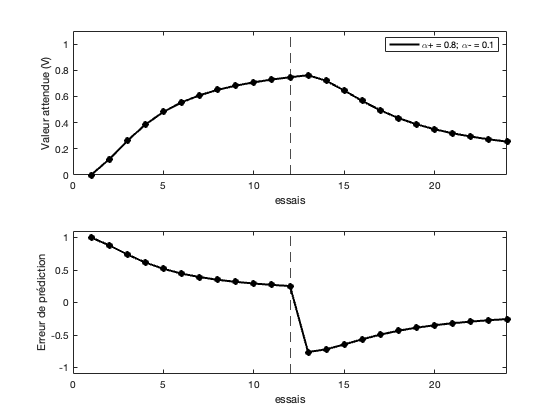

In [39]:
figure

% Afficher les résultats de la simulation pour la valeur attendue
subplot(2, 1, 1)
value = plot(VV, '-k');  % Ligne noire reliant les points
hold on
plot(VV, 'ok', 'MarkerFaceColor', 'k');  % Points noirs pour chaque observation
xline(12, '--k', 'LineWidth', 1);  % Ligne verticale en pointillés au 12ème essai
set(value, 'LineWidth', 2);
xlim([0, ntrials]);
ylim([0, 1.1]);
xlabel('essais');
ylabel('Valeur attendue (V)');
legend([value],['\alpha+ = ', num2str(alphaE), '; \alpha- = ', num2str(alphaI)]);

hold off

% Afficher les résultats de la simulation pour l'erreur de prédiction
subplot(2, 1, 2);
prediction_error = plot(PE, '-k');  % Ligne noire reliant les points
hold on
plot(PE, 'ok', 'MarkerFaceColor', 'k');  % Points noirs pour chaque observation
xline(12, '--k', 'LineWidth', 1);  % Ligne verticale en pointillés au 12ème essai

set(prediction_error, 'LineWidth', 2);
xlim([0, ntrials]);
ylim([-1.1, 1.1]);
xlabel('essais');
ylabel('Erreur de prédiction');
hold off

